Nodes:
 [[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [0.  0.1]
 [0.1 0.1]
 [0.2 0.1]
 [0.3 0.1]
 [0.4 0.1]
 [0.5 0.1]
 [0.6 0.1]
 [0.7 0.1]
 [0.8 0.1]
 [0.9 0.1]
 [1.  0.1]
 [0.  0.2]
 [0.1 0.2]
 [0.2 0.2]
 [0.3 0.2]
 [0.4 0.2]
 [0.5 0.2]
 [0.6 0.2]
 [0.7 0.2]
 [0.8 0.2]
 [0.9 0.2]
 [1.  0.2]
 [0.  0.3]
 [0.1 0.3]
 [0.2 0.3]
 [0.3 0.3]
 [0.4 0.3]
 [0.5 0.3]
 [0.6 0.3]
 [0.7 0.3]
 [0.8 0.3]
 [0.9 0.3]
 [1.  0.3]
 [0.  0.4]
 [0.1 0.4]
 [0.2 0.4]
 [0.3 0.4]
 [0.4 0.4]
 [0.5 0.4]
 [0.6 0.4]
 [0.7 0.4]
 [0.8 0.4]
 [0.9 0.4]
 [1.  0.4]
 [0.  0.5]
 [0.1 0.5]
 [0.2 0.5]
 [0.3 0.5]
 [0.4 0.5]
 [0.5 0.5]
 [0.6 0.5]
 [0.7 0.5]
 [0.8 0.5]
 [0.9 0.5]
 [1.  0.5]
 [0.  0.6]
 [0.1 0.6]
 [0.2 0.6]
 [0.3 0.6]
 [0.4 0.6]
 [0.5 0.6]
 [0.6 0.6]
 [0.7 0.6]
 [0.8 0.6]
 [0.9 0.6]
 [1.  0.6]
 [0.  0.7]
 [0.1 0.7]
 [0.2 0.7]
 [0.3 0.7]
 [0.4 0.7]
 [0.5 0.7]
 [0.6 0.7]
 [0.7 0.7]
 [0.8 0.7]
 [0.9 0.7]
 [1.  0.7]
 [0.  0.8]
 [0.1 0.8]
 [

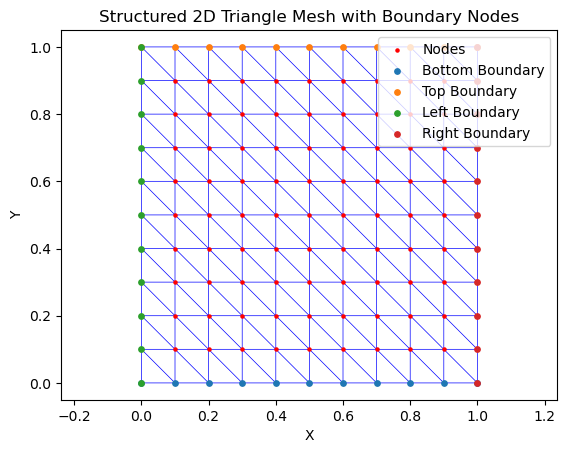

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_structured_mesh(x_min, x_max, y_min, y_max, nx, ny):
    """
    Generate a structured 2D triangular mesh.
    :param x_min: Minimum x-coordinate
    :param x_max: Maximum x-coordinate
    :param y_min: Minimum y-coordinate
    :param y_max: Maximum y-coordinate
    :param nx: Number of divisions along x
    :param ny: Number of divisions along y
    :return: nodes, triangles, boundary nodes by side
    """
    # Create grid points
    x = np.linspace(x_min, x_max, nx + 1)
    y = np.linspace(y_min, y_max, ny + 1)
    xx, yy = np.meshgrid(x, y)
    nodes = np.column_stack([xx.ravel(), yy.ravel()])

    # Connectivity for triangles
    triangles = []
    for i in range(ny):
        for j in range(nx):
            # Bottom-left, bottom-right, top-left, top-right
            n1 = i * (nx + 1) + j
            n2 = n1 + 1
            n3 = n1 + (nx + 1)
            n4 = n3 + 1

            # Two triangles per grid cell
            triangles.append([n1, n2, n3])
            triangles.append([n2, n4, n3])

    triangles = np.array(triangles)

    # Define boundary nodes by side
    bottom = np.arange(0, nx + 1)
    top = np.arange(nx * (ny + 1), (nx + 1) * (ny + 1))
    left = np.arange(0, (ny + 1) * (nx + 1), nx + 1)
    right = np.arange(nx, (ny + 1) * (nx + 1), nx + 1)

    boundary_nodes_by_side = {
        "bottom": bottom,
        "top": top,
        "left": left,
        "right": right
    }

    return nodes, triangles, boundary_nodes_by_side

# Parameters for the structured mesh
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
nx, ny = 10, 10  # Number of divisions along x and y

# Generate the mesh
nodes, triangles, boundary_nodes_by_side = generate_structured_mesh(x_min, x_max, y_min, y_max, nx, ny)

# Output
print("Nodes:\n", nodes)
print("\nTriangles:\n", triangles)
for side, nodes_set in boundary_nodes_by_side.items():
    print(f"\nBoundary Nodes for {side.capitalize()} Side:\n", nodes_set)

# Visualization
plt.triplot(nodes[:, 0], nodes[:, 1], triangles, color='blue', linewidth=0.5)
plt.scatter(nodes[:, 0], nodes[:, 1], color='red', s=5, label='Nodes')
for side, nodes_set in boundary_nodes_by_side.items():
    plt.scatter(nodes[nodes_set, 0], nodes[nodes_set, 1], s=15, label=f'{side.capitalize()} Boundary')
plt.legend()
plt.title("Structured 2D Triangle Mesh with Boundary Nodes")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()


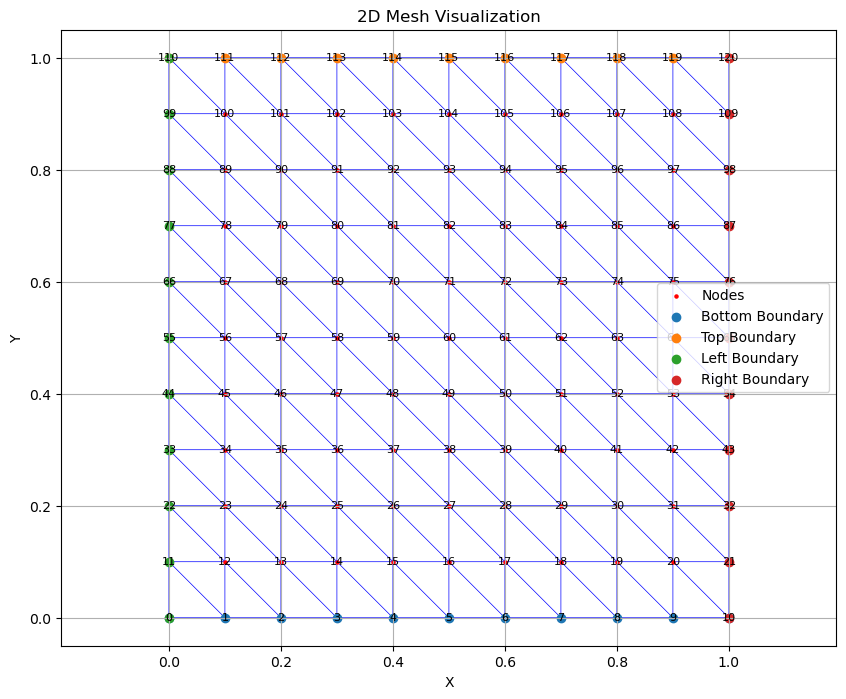

In [ ]:
import numpy as np
import triangle
import matplotlib.pyplot as plt


class Mesh2D:
    def __init__(self, x_min=0.0, x_max=1.0, y_min=0.0, y_max=1.0, mesh_size=0.1, structured=True, nx=None, ny=None):
        """
        Initialize a 2D mesh with either structured or unstructured configuration.
        :param x_min: Minimum x-coordinate.
        :param x_max: Maximum x-coordinate.
        :param y_min: Minimum y-coordinate.
        :param y_max: Maximum y-coordinate.
        :param mesh_size: Desired element size (for unstructured).
        :param structured: True for structured mesh, False for unstructured.
        :param nx: Number of divisions along x (for structured).
        :param ny: Number of divisions along y (for structured).
        """
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.mesh_size = mesh_size
        self.structured = structured
        self.nx = nx if nx else int((x_max - x_min) / mesh_size)
        self.ny = ny if ny else int((y_max - y_min) / mesh_size)
        self.nodes_coords = None
        self.triangles = None
        self.boundary_nodes = None
        self.boundary_lines = None
        self.side_normals = None

        if structured:
            self._generate_structured_mesh()
        else:
            self._generate_unstructured_mesh()

    def _generate_structured_mesh(self):
        """
        Generate a structured 2D triangular mesh.
        """
        x = np.linspace(self.x_min, self.x_max, self.nx + 1)
        y = np.linspace(self.y_min, self.y_max, self.ny + 1)
        xx, yy = np.meshgrid(x, y)
        self.nodes_coords = np.column_stack([xx.ravel(), yy.ravel()])

        # Generate connectivity
        self.triangles = []
        for i in range(self.ny):
            for j in range(self.nx):
                n1 = i * (self.nx + 1) + j
                n2 = n1 + 1
                n3 = n1 + (self.nx + 1)
                n4 = n3 + 1
                self.triangles.append([n1, n2, n3])
                self.triangles.append([n2, n4, n3])
        self.triangles = np.array(self.triangles)

        # Boundary nodes
        self.boundary_nodes = {
            "bottom": np.arange(0, self.nx + 1),
            "top": np.arange(self.nx * (self.ny + 1), (self.nx + 1) * (self.ny + 1)),
            "left": np.arange(0, (self.ny + 1) * (self.nx + 1), self.nx + 1),
            "right": np.arange(self.nx, (self.ny + 1) * (self.nx + 1), self.nx + 1)
        }

        # Boundary lines
        self.boundary_lines = {
            "bottom": [(n1, n2) for n1, n2 in zip(self.boundary_nodes["bottom"][:-1], self.boundary_nodes["bottom"][1:])],
            "top": [(n1, n2) for n1, n2 in zip(self.boundary_nodes["top"][:-1], self.boundary_nodes["top"][1:])],
            "left": [(n1, n2) for n1, n2 in zip(self.boundary_nodes["left"][:-1], self.boundary_nodes["left"][1:])],
            "right": [(n1, n2) for n1, n2 in zip(self.boundary_nodes["right"][:-1], self.boundary_nodes["right"][1:])]
        }

        # Include corner nodes in adjacent sides
        self._include_corners_in_boundary_lines()

    def _generate_unstructured_mesh(self):
        """
        Generate an unstructured 2D triangular mesh using the Triangle library.
        """
        vertices = np.array([
            [self.x_min, self.y_min],
            [self.x_max, self.y_min],
            [self.x_max, self.y_max],
            [self.x_min, self.y_max]
        ])
        segments = np.array([
            [0, 1],
            [1, 2],
            [2, 3],
            [3, 0]
        ])
        geometry = {"vertices": vertices, "segments": segments}
        area_constraint = (self.mesh_size ** 2) * np.sqrt(3) / 4
        mesh = triangle.triangulate(geometry, f"pq30a{area_constraint}")

        self.nodes_coords = mesh["vertices"]
        self.triangles = mesh["triangles"]
        edges = mesh["segments"]

        # Boundary nodes
        self.boundary_nodes = {
            "bottom": set(edges[edges[:, 0] == 0].flatten()),
            "right": set(edges[edges[:, 0] == 1].flatten()),
            "top": set(edges[edges[:, 0] == 2].flatten()),
            "left": set(edges[edges[:, 0] == 3].flatten())
        }

        # Boundary lines
        self.boundary_lines = {
            side: [(n1, n2) for n1, n2 in zip(sorted(nodes)[:-1], sorted(nodes)[1:])]
            for side, nodes in self.boundary_nodes.items()
        }

        # Include corner nodes in adjacent sides
        self._include_corners_in_boundary_lines()

    def _include_corners_in_boundary_lines(self):
        """
        Ensure corner nodes are correctly included in boundary lines for adjacent sides.
        """
        corners = {
            (self.x_min, self.y_min): ("bottom", "left"),
            (self.x_max, self.y_min): ("bottom", "right"),
            (self.x_max, self.y_max): ("top", "right"),
            (self.x_min, self.y_max): ("top", "left")
        }
        for corner, sides in corners.items():
            corner_index = np.where((self.nodes_coords == corner).all(axis=1))[0][0]

            for side in sides:
                # Ensure the corner is part of the boundary node list
                if corner_index not in self.boundary_nodes[side]:
                    self.boundary_nodes[side] = np.append(self.boundary_nodes[side], corner_index)

                # Add the corner to the boundary line only if it is not already included
                side_lines = self.boundary_lines[side]
                if len(side_lines) > 0 and corner_index not in side_lines[-1]:
                    # Connect the corner node to the previous node in the same boundary
                    previous_node = self.boundary_nodes[side][-2]  # Second to last node
                    side_lines[-1] = (previous_node, corner_index)

    def compute_side_normals(self):
        """
        Compute normal vectors for side boundary elements.
        """
        normals = {}
        for side, lines in self.boundary_lines.items():
            side_normals = []
            for n1, n2 in lines:
                p1 = self.nodes_coords[n1]
                p2 = self.nodes_coords[n2]
                tangent = p2 - p1
                normal = np.array([-tangent[1], tangent[0]])  # Rotate 90 degrees
                normal /= np.linalg.norm(normal)
                side_normals.append(normal)
            normals[side] = side_normals
        self.side_normals = normals

    def visualize(self, show_node_numbers=False):
        """
        Visualize the mesh, boundary nodes, and optionally display node numbers.
        :param show_node_numbers: If True, display node numbers on the plot.
        """
        plt.figure(figsize=(10, 8))  # Increased figure size for clarity
        plt.triplot(self.nodes_coords[:, 0], self.nodes_coords[:, 1], self.triangles, color='blue', linewidth=0.5)
        plt.scatter(self.nodes_coords[:, 0], self.nodes_coords[:, 1], color='red', s=5, label='Nodes')
        
        # Highlight boundary nodes
        for side, nodes in self.boundary_nodes.items():
            plt.scatter(self.nodes_coords[list(nodes), 0], self.nodes_coords[list(nodes), 1], label=f'{side.capitalize()} Boundary')
        
        # Optionally display node numbers
        if show_node_numbers:
            for i, (x, y) in enumerate(self.nodes_coords):
                plt.text(x, y, str(i), fontsize=8, color='black', ha='center', va='center')
        
        plt.legend()
        plt.title("2D Mesh Visualization")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.axis("equal")
        plt.grid(True)
        plt.show()



# Example Usage
mesh = Mesh2D(x_min=0, x_max=1, y_min=0, y_max=1, mesh_size=0.1, structured=True)
mesh.compute_side_normals()
mesh.visualize(show_node_numbers=True)


In [29]:
mesh.nodes[1]

array([0.1, 0. ])